<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;"> Qualitative_Bankruptcy database Analysis
<font color=Black>    
    
1. Title: Qualitative_Bankruptcy database

2. Source Information
   	-- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
  	-- Guided By: Dr.V.Prasanna Venkatesan
   	-- Date:      February 2014

3. Past Usage:
	The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of experts’ 
	decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">1. Understand feature and target variables 
<font color=Black>  

In [64]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Let's load the data and look for the basic attributes

df = pd.read_csv("Qualitative_Bankruptcy.data.txt")
df.columns = ['Industrial Risk', 'Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
print(df.shape)
df.head()

(249, 7)


,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [66]:
print(df.shape)
print(df.info())
df.isnull().sum().sort_values(ascending=False) 

(249, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
Industrial Risk          249 non-null object
Management Risk          249 non-null object
Financial Flexibility    249 non-null object
Credibility              249 non-null object
Competitiveness          249 non-null object
Operating Risk           249 non-null object
Class                    249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB
None


Class                    0
Operating Risk           0
Competitiveness          0
Credibility              0
Financial Flexibility    0
Management Risk          0
Industrial Risk          0
dtype: int64

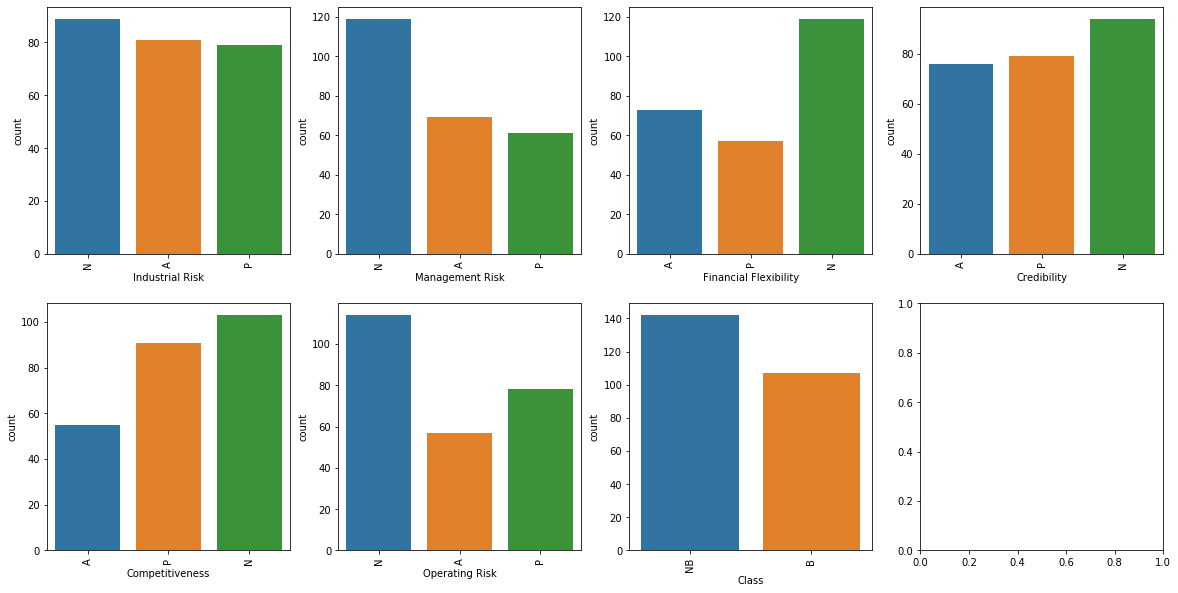

In [67]:
# Having look at frequency distribution of the variables.

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

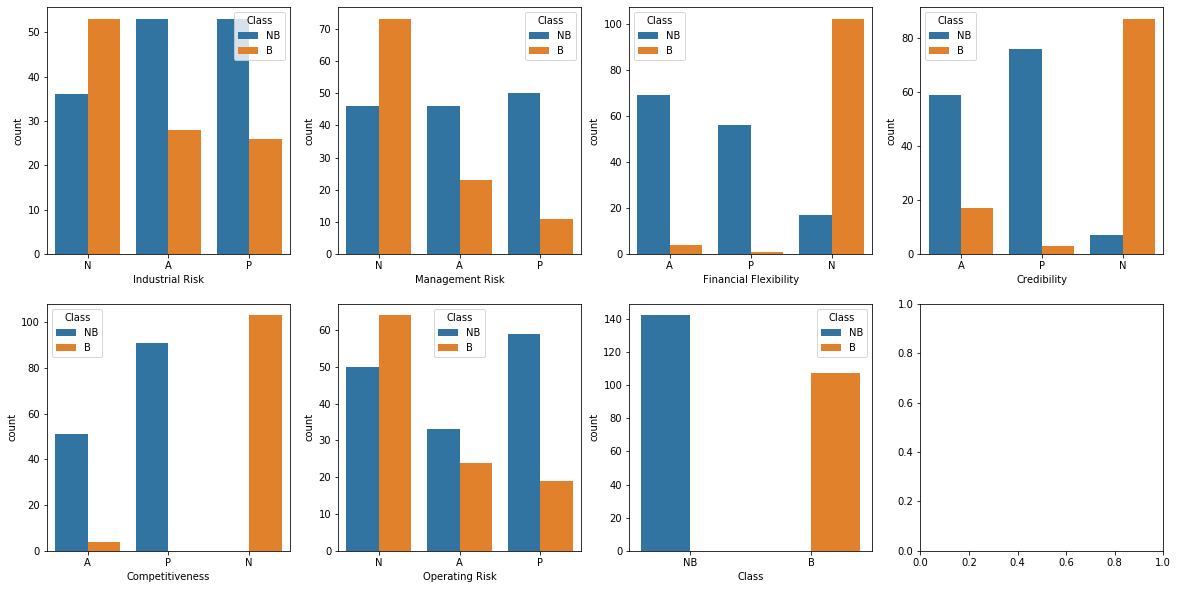

In [68]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
c_palette = ['tab:blue', 'tab:orange']
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.countplot(x=variable,hue='Class',data=df, palette=c_palette,ax=subplot)


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;"> Quick observation of data
<font color=Black>  
    1. In data collected, most of the data points have low management risk.
    2. Most of the records have negative financial flexibility.
    3. Most of the records have Negative operating risk
    4. Most of the records fall under Non Bankruptcy Class
   
    
    Sanity wise
    1. There are no nulls in data
    2. There is no data missing


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">2. Encode independent features
<font color=Black>  

In [69]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
df_t=df.copy()

categorical_cols=['Industrial Risk', 'Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk']
df_t[categorical_cols] = df_t[categorical_cols].apply(lambda col: le.fit_transform(col))
df_t.head(10)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False ) 
X_ohe = ohe.fit_transform(df_t[categorical_cols])
X_ohe

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [86]:
X_ohe.shape

(249, 18)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">3. Separate the dependent variable from rest of the data
<font color=Black>  

In [70]:
y=df_t.pop("Class")
y.head()

0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">4. Split the dataset into test and train data. ( Take 80:20 ) 
<font color=Black>  

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.20, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">5. Apply PCA on independent features of train data<br> 6. Display elbow plot to show reduced number of components
<font color=Black>  

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00505051e+00 -5.21334367e-01 -4.76423292e-01  2.69997050e-01
  -2.88730360e-01  5.71999680e-02  1.74104080e-02  2.09101739e-02
  -4.53555506e-02 -5.84241879e-03 -6.35548265e-02  7.13678559e-02
   4.22504785e-02 -6.79362259e-02  3.32225310e-02  2.23901455e-01
  -2.03322720e-01  1.76547333e-02]
 [-5.21334367e-01  1.00505051e+00 -5.09463290e-01 -3.25217820e-01
   4.18789926e-01 -1.48572797e-01 -1.16565970e-01  1.49977001e-01
  -5.12833458e-02 -2.55095303e-02  6.46374702e-02 -4.13989875e-02
  -9.39592094e-02  2.86233135e-01 -2.12565436e-01 -4.31497456e-02
   2.09480845e-01 -1.84133265e-01]
 [-4.76423292e-01 -5.09463290e-01  1.00505051e+00  6.27161220e-02
  -1.40197986e-01  9.53428863e-02  1.02497030e-01 -1.75543827e-01
   9.85464930e-02  3.21628612e-02 -2.49071557e-03 -2.93200703e-02
   5.41692953e-02 -2.26294203e-01  1.85424123e-01 -1.81309365e-01
  -1.07433501e-02  1.71838145e-01]
 [ 2.69997050e-01 -3.25217820e-01  6.27161220e-02  1.00505051e+00
  -5.59911558e-

In [139]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.07299088 -0.46503242 -0.01765515 -0.04144424  0.19933781  0.04460593
  -0.46109738  0.0714624  -0.42471164  0.02939448  0.07272475  0.00789533
  -0.03144156  0.06787121 -0.489406    0.2682561   0.06804679 -0.14580127]
 [-0.18238802  0.35294403  0.13207695 -0.11952083  0.01383745  0.39800326
   0.42883    -0.20877613 -0.05656208 -0.07884768  0.13238981 -0.22961975
  -0.03211657  0.06932832 -0.49991293  0.27401522  0.06950767 -0.14893144]
 [ 0.11424791  0.10537361 -0.118225    0.16488059 -0.21523404 -0.45487701
   0.02325125  0.14296608  0.48646982  0.05156805 -0.20967299  0.22852455
  -0.03118421  0.06731568 -0.48540018  0.26606041  0.06748983 -0.14460788]
 [ 0.10936573 -0.47498562  0.01445807  0.0737179  -0.1945947  -0.02281185
   0.37079048  0.0120188   0.12969676  0.21316162  0.46226725 -0.05535399
   0.03897566  0.26665226  0.27007925  0.36590107  0.19540657 -0.08013612]
 [-0.26973416  0.24624849 -0.02002236  0.05246733  0.06643694  0.29857486
  -0.5160476   0

In [140]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 26.13266297  38.12139312  48.25264137  57.80507572  65.98127694
  73.73963497  80.99131395  86.80232651  91.75820948  96.10021513
  98.73786823 100.         100.         100.         100.
 100.         100.         100.        ]


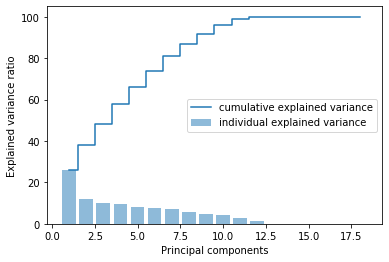

In [141]:
plt.bar(range(1,19), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

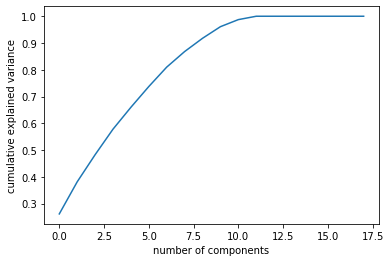

In [142]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_std.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">
<font color=Black>  
    As evident from the elbow and the cumulative explained variance graph, it looks like 10 is optimal number of components.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">7. Transform the data using PCA
<font color=Black>  

In [143]:
pca = PCA(n_components=10)
X_train_std = pca.fit_transform(X_train_std)

In [144]:
X_train_std=pd.DataFrame(data=X_train_std)

In [145]:
X_train_std.head()

,0,1,2,3,4,5,6,7,8,9
0,2.072164,2.364853,0.397613,-1.141921,-0.041533,1.211776,-1.247283,0.003508,-1.212111,-0.044343
1,-0.669809,0.333051,-0.091618,1.318016,-1.839830,0.621846,0.916820,-0.415593,2.690847,-1.811640
2,-2.249759,3.026561,1.342282,1.767839,-1.161630,0.417051,0.651277,1.253262,-0.069857,-0.119872
3,2.615345,-0.583411,-1.039330,-0.260663,-0.531821,-0.711403,1.812303,-1.003244,-0.789919,-0.233479
4,1.982182,1.146734,1.285383,-2.214962,0.113448,-0.739677,-1.295471,0.477973,-0.606271,-1.077518


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">8. Apply K-Means algo on this data
<font color=Black>  

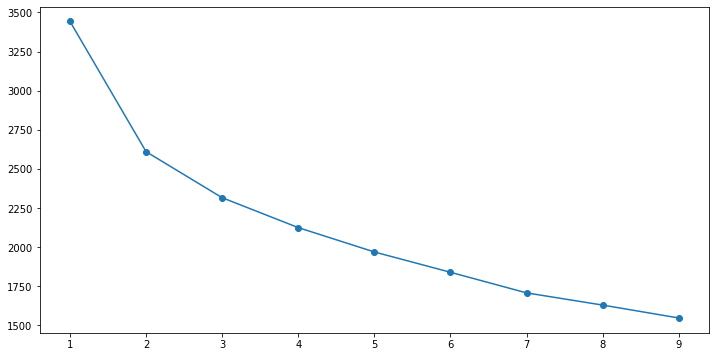

In [146]:

from sklearn.cluster import KMeans
Cluster_error = []
cluster_range = range( 1, 10 )
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Cluster_error, marker = "o" )

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">It looks like 3 are optimal number of clusters in the dataset<br><br> 9. Select optimal number of clusters and form clusters on train data
<font color=Black>  

In [147]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(X_train_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [148]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_train_std) )


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.23206023505574574


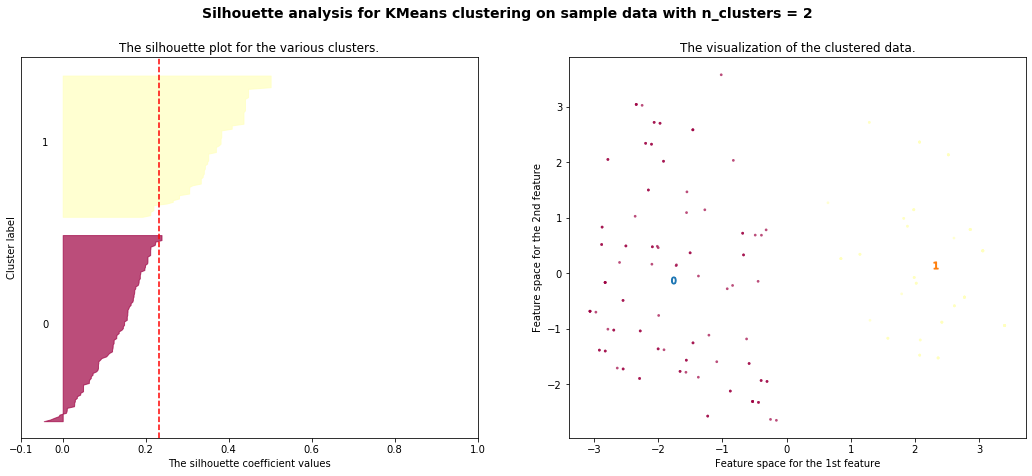

For n_clusters = 3 The average silhouette_score is : 0.2405738841983172


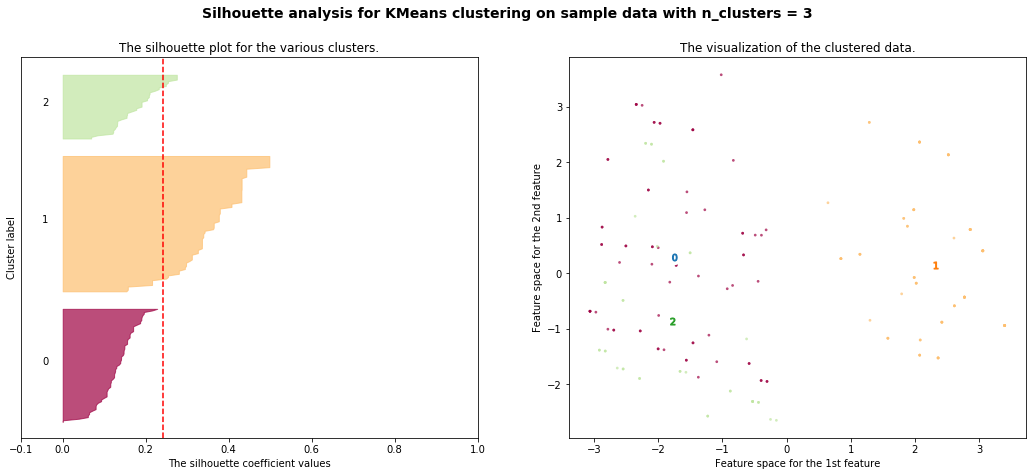

For n_clusters = 4 The average silhouette_score is : 0.24017423542937366


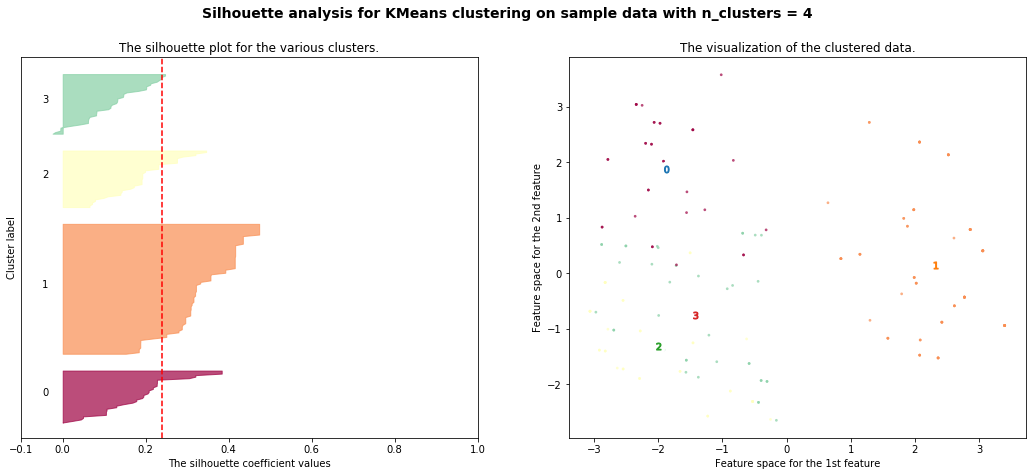

For n_clusters = 5 The average silhouette_score is : 0.18524749192621467


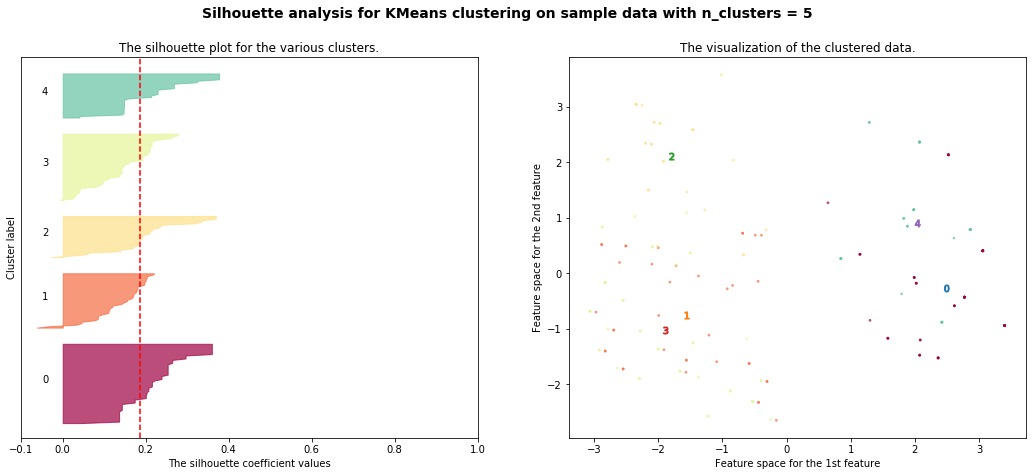

For n_clusters = 6 The average silhouette_score is : 0.19010532272941322


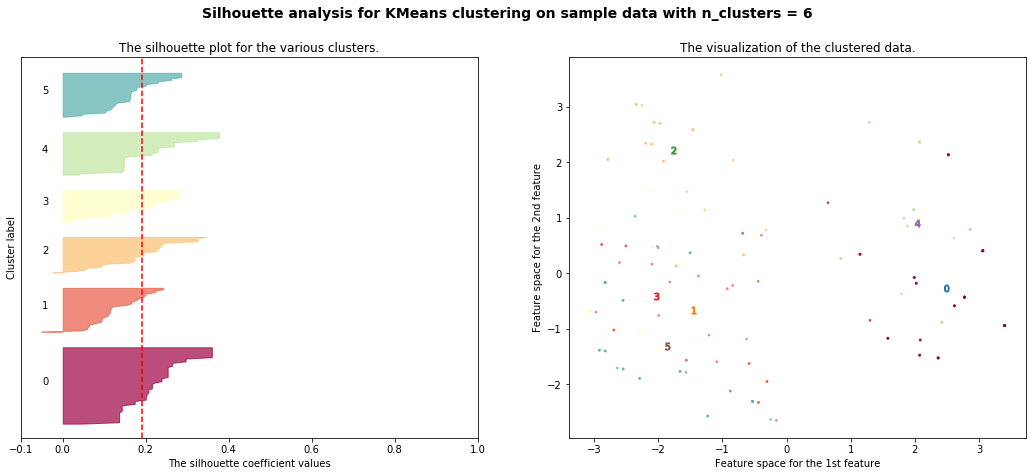

For n_clusters = 7 The average silhouette_score is : 0.20378437837451568


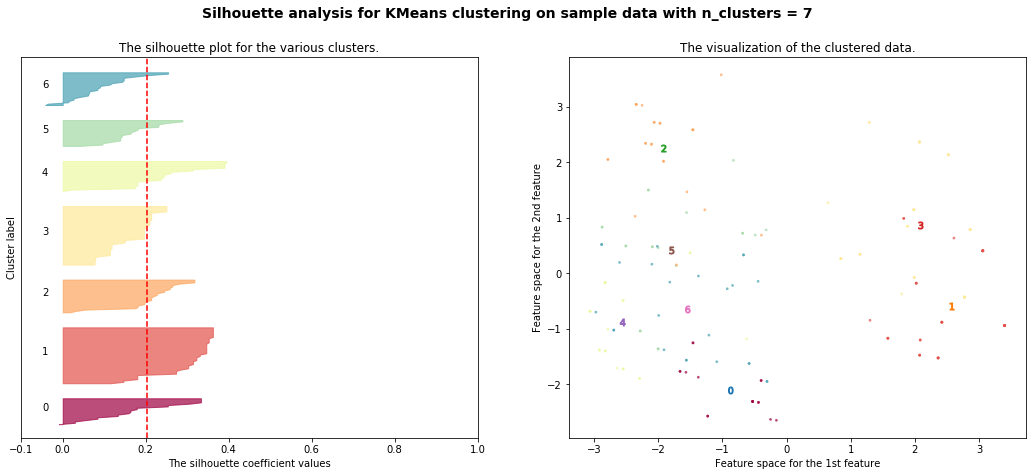

For n_clusters = 8 The average silhouette_score is : 0.21318208760812865


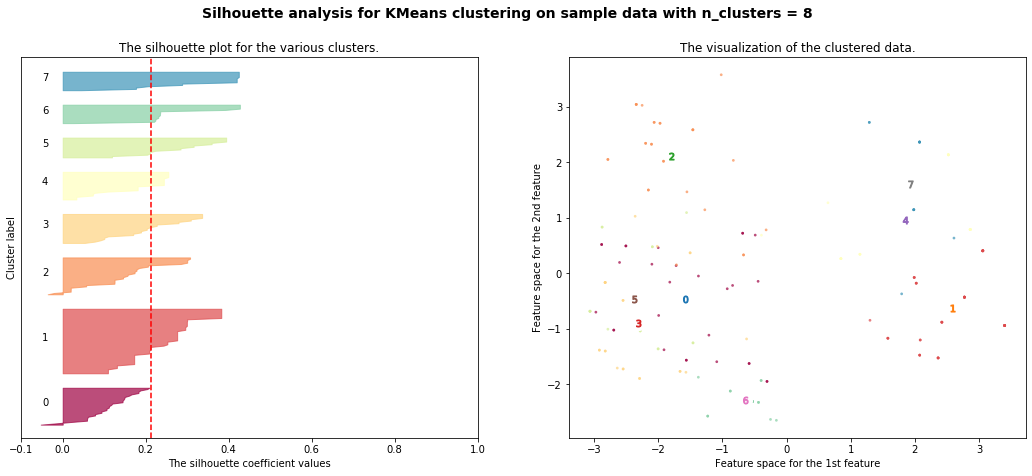

In [149]:
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train_std.values

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">silhouette_score confirms that 3 is optimal number of clusters in this dataset.<br><br>  10. Create a new column in the train data and populate it with cluster labels
<font color=Black>

In [150]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
X_Train_data=X_train_std.join(df_labels)
X_Train_data.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,2.072164,2.364853,0.397613,-1.141921,-0.041533,1.211776,-1.247283,0.003508,-1.212111,-0.044343,2
1,-0.669809,0.333051,-0.091618,1.318016,-1.839830,0.621846,0.916820,-0.415593,2.690847,-1.811640,1
2,-2.249759,3.026561,1.342282,1.767839,-1.161630,0.417051,0.651277,1.253262,-0.069857,-0.119872,1
3,2.615345,-0.583411,-1.039330,-0.260663,-0.531821,-0.711403,1.812303,-1.003244,-0.789919,-0.233479,2
4,1.982182,1.146734,1.285383,-2.214962,0.113448,-0.739677,-1.295471,0.477973,-0.606271,-1.077518,2


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">11. Transform the test data using the same PCA objct that was fit on the train data.
<font color=Black>

In [151]:
X_test_std = pca.transform(X_test_std)
X_test_std=pd.DataFrame(data=X_test_std)
X_test_std.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-2.111644,-1.585930,2.616669,-1.282429,1.349906,1.431889,0.123612,0.353635,1.683581,-0.239369
1,0.997053,0.188766,-1.448161,-0.233658,0.868669,-2.025366,0.189001,2.450218,1.288537,-0.146528
2,2.631452,-0.533902,0.519540,-1.675009,0.139700,-0.938620,-0.547221,0.571724,0.547294,0.764613
3,1.520100,2.259032,0.097390,-1.197274,0.534716,-1.559308,-0.088742,0.727614,0.847497,-1.912085
4,-0.361774,1.855994,-0.542516,1.705188,-1.167472,-0.106830,0.804623,0.103832,1.791977,1.580358
5,1.860680,0.961684,1.063310,-2.320793,0.130653,-0.613050,-1.269922,0.302850,-0.404749,-1.051048
6,-1.007436,-0.401687,0.870351,2.946350,-1.758155,-0.602523,1.512515,0.719033,0.956290,-0.124800
7,2.485572,0.452277,0.573078,-0.516485,-0.610778,0.547648,-0.995108,-0.665420,-1.130044,-1.894599
8,1.888767,-0.333045,-0.601643,2.132308,1.459189,-0.198864,1.123301,-0.685923,1.026645,-1.046275
9,-2.314656,2.826105,1.015622,1.567015,-1.179055,0.515677,0.562535,0.945459,0.124157,-0.058596


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature
<font color=Black>

In [152]:
clusters.fit(X_test_std)
labels = clusters.labels_
df_labels1 = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels1['labels'] = df_labels1['labels'].astype('category')
X_test_data=X_test_std.join(df_labels1)
X_test_data.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,-2.111644,-1.585930,2.616669,-1.282429,1.349906,1.431889,0.123612,0.353635,1.683581,-0.239369,2
1,0.997053,0.188766,-1.448161,-0.233658,0.868669,-2.025366,0.189001,2.450218,1.288537,-0.146528,1
2,2.631452,-0.533902,0.519540,-1.675009,0.139700,-0.938620,-0.547221,0.571724,0.547294,0.764613,1
3,1.520100,2.259032,0.097390,-1.197274,0.534716,-1.559308,-0.088742,0.727614,0.847497,-1.912085,2
4,-0.361774,1.855994,-0.542516,1.705188,-1.167472,-0.106830,0.804623,0.103832,1.791977,1.580358,2


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">13. Apply SVC model on train dataset and predict target for test dataset
<font color=Black>

In [158]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train_std, y_train)

prediction = svc_model.predict(X_test_std)

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">14.Check accuracy and confusion matrix

In [160]:
#Accuracy of the model
print(svc_model.score(X_train_std, y_train))
print(svc_model.score(X_test_std, y_test))
print("\nConfusion Matrix:\n",confusion_matrix(prediction,y_test))

0.9949748743718593
1.0

Confusion Matrix:
 [[21  0]
 [ 0 29]]


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">Conclusion</span>
<font color=Black>
    <br>This was a good data and PCA did help a lot by reducing the noise
    <br>We were able to build 3 healthy clusters
    <br>SVM worked nicely on this data and provided 100% accuracy on test data and 99.49% accuracy on train data. 